## Daniel Barella
11/5/25

## 🧠 Day 36 — Neural Network Basics

**Focus:** Understanding how neural networks learn through layers, weights, and activations.  
**Key Tools:** `NumPy`, `TensorFlow`, `Keras`, `matplotlib`

In [1]:
pip install tensorflow-macos


Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install --upgrade scipy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.3/30.3 MB 36.9 MB/s eta 0:00:00m eta 0:00:010:00:01
  Attempting uninstall: scipy
    Found existing installation: scipy 1.9.3
    Uninstalling scipy-1.9.3:
      Successfully uninstalled scipy-1.9.3
Note: you may need to restart the kernel to use updated packages.


In [10]:
# === Imports ===
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD


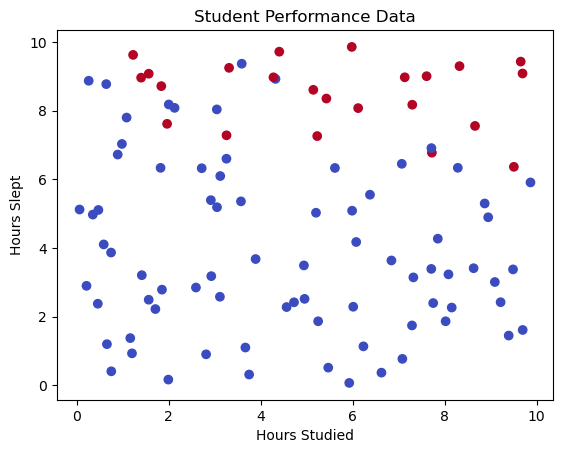

In [6]:
# === Generate Simple Dataset ===
np.random.seed(42)
hours_studied = np.random.uniform(0, 10, 100)
hours_sleep = np.random.uniform(0, 10, 100)
labels = (0.3 * hours_studied + 0.7 * hours_sleep + np.random.randn(100)) > 7

X = np.column_stack((hours_studied, hours_sleep))
y = labels.astype(int)

plt.scatter(hours_studied, hours_sleep, c=y, cmap='coolwarm')
plt.xlabel('Hours Studied')
plt.ylabel('Hours Slept')
plt.title('Student Performance Data')
plt.show()


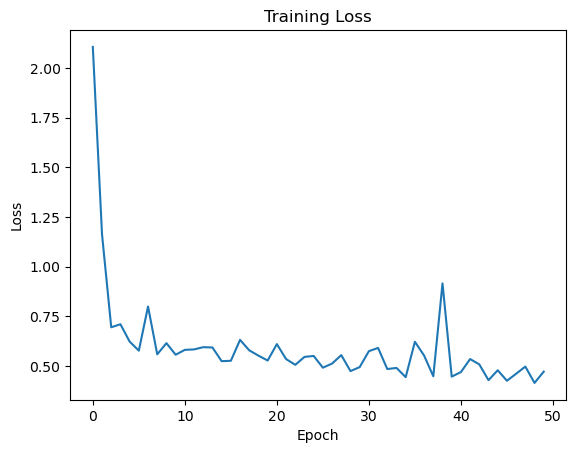

In [11]:
# === Simple Perceptron Model (Keras) ===
model = Sequential([
    Input(shape=(2,)),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=SGD(learning_rate=0.1), loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X, y, epochs=50, verbose=0)

plt.plot(history.history['loss'])
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


In [12]:
# === Evaluate Model ===
loss, acc = model.evaluate(X, y, verbose=0)
print(f"Model Accuracy: {acc:.2f}")


Model Accuracy: 0.76


## 🧩 Mini Project: Visualizing Decision Boundary

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step


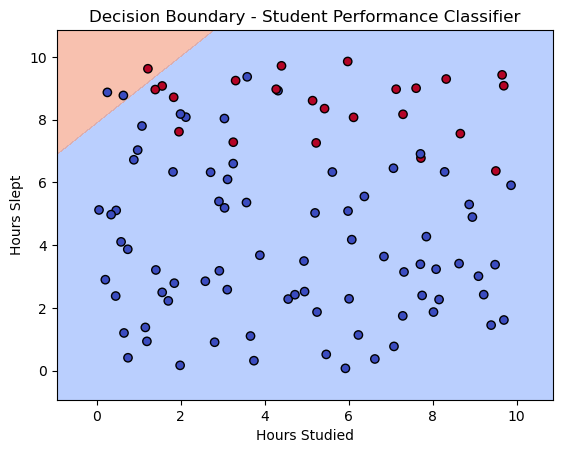

In [14]:
# === Decision Boundary Visualization ===
xx, yy = np.meshgrid(
    np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100),
    np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100)
)
grid = np.c_[xx.ravel(), yy.ravel()]
preds = model.predict(grid).reshape(xx.shape)

plt.contourf(xx, yy, preds, levels=[0, 0.5, 1], cmap='coolwarm', alpha=0.6)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
plt.xlabel('Hours Studied')
plt.ylabel('Hours Slept')
plt.title('Decision Boundary - Student Performance Classifier')
plt.show()


## ✅ What this does:

Creates a 2D grid of points covering the feature space.

Uses the trained model to classify each point.

Colors the regions by predicted class.

Overlays training points on top.